## Project 7 - APIs

Introduction to APIs. Tests will be conducted here to get information from free APIs. 

In [1]:
# conducting tests 

# importing known relevant modules

import requests
import datetime as dt
from datetime import datetime, timedelta
import pandas as pd
from pandas import json_normalize
import urllib3
import json 
import os
from dotenv import load_dotenv, dotenv_values
import json
import matplotlib.pyplot as plt

#### Step 1 - Simple API call

In [2]:
# API - IEX financial data 

# Base URL from IEX API for fetching stock data - in this case taking $TSLA

base_url = 'https://api.iex.cloud/v1/data/core/' # url provided in iex gui 

api_key = 'pk_54799237f22d49b29d1a9135a0a1c3b3' # key/token used to authenticate user | !! - Note: keys shouldn't be disclosed if files are pushed to github (see secure methods below) 

info = 'quote' # quote is specified to retrieve stock prices, as they may be other type of products, commodities one could get

stock = 'tsla' # choose the stock ticker/symbol you want to retrieve data from

# Construct the full API request URL
url = base_url + info + '/'+ stock + '?token=' + api_key 

# Make a GET request to the OpenWeatherMap API and parse the response as JSON
response = requests.get(url).json()

print(response)

[{'avgTotalVolume': 76159320, 'calculationPrice': 'close', 'change': 2.6, 'changePercent': 0.01476, 'close': None, 'closeSource': 'official', 'closeTime': None, 'companyName': 'Tesla Inc', 'currency': 'USD', 'delayedPrice': None, 'delayedPriceTime': None, 'extendedChange': None, 'extendedChangePercent': None, 'extendedPrice': None, 'extendedPriceTime': None, 'high': None, 'highSource': None, 'highTime': None, 'iexAskPrice': 0, 'iexAskSize': 0, 'iexBidPrice': 0, 'iexBidSize': 0, 'iexClose': 178.765, 'iexCloseTime': 1717099199801, 'iexLastUpdated': 1717099199801, 'iexMarketPercent': 13.098301789469508, 'iexOpen': 178.46, 'iexOpenTime': 1717075801116, 'iexRealtimePrice': 178.765, 'iexRealtimeSize': 100, 'iexVolume': 660233, 'lastTradeTime': 1717099199982, 'latestPrice': 178.79, 'latestSource': 'Close', 'latestTime': 'May 30, 2024', 'latestUpdate': 1717099200242, 'latestVolume': None, 'low': None, 'lowSource': None, 'lowTime': None, 'marketCap': 560233109346, 'oddLotDelayedPrice': None, 'o

In [3]:
# API response is a python list, so converting it to a dataframe is straightforward: 

df = pd.DataFrame(response)

print(df)


   avgTotalVolume calculationPrice  change  changePercent close closeSource  \
0        76159320            close     2.6        0.01476  None    official   

  closeTime companyName currency delayedPrice  ... peRatio previousClose  \
0      None   Tesla Inc      USD         None  ...   45.73        176.19   

  previousVolume primaryExchange symbol volume week52High week52Low  \
0       54782649          NASDAQ   TSLA   None     299.29     138.8   

   ytdChange  isUSMarketOpen  
0  -0.276169           False  

[1 rows x 56 columns]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avgTotalVolume          1 non-null      int64  
 1   calculationPrice        1 non-null      object 
 2   change                  1 non-null      float64
 3   changePercent           1 non-null      float64
 4   close                   0 non-null      object 
 5   closeSource             1 non-null      object 
 6   closeTime               0 non-null      object 
 7   companyName             1 non-null      object 
 8   currency                1 non-null      object 
 9   delayedPrice            0 non-null      object 
 10  delayedPriceTime        0 non-null      object 
 11  extendedChange          0 non-null      object 
 12  extendedChangePercent   0 non-null      object 
 13  extendedPrice           0 non-null      object 
 14  extendedPriceTime       0 non-null      object

#### Step 2 - API call using a separate environemnt for secure API key storage  

In [5]:
# API - OpenWeather for weather data (forecasts)

# Base URL from OpenWeather for Current Weather - in this case taking Berlin as city

base_url = 'https://api.openweathermap.org/data/2.5/weather?'

city = 'Berlin'

load_dotenv('API.env') # in this case key is stored in a separate .env file that is explicitly excluded from publishing using .gitignore

API_key = os.getenv('weather_APIkey') # this variable holds the key securely stored in the .env file

if API_key is None: # this check will review if the API key is found 
    raise ValueError("API key not found. Please set it in the API.env file.")

URL = base_url + 'q=' + city + '&appid=' + API_key # this should be the full http call construct before triggering the API call below 

response = requests.get(URL).json() # calling the API

print(response)

{'coord': {'lon': 13.4105, 'lat': 52.5244}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 291.44, 'feels_like': 291.41, 'temp_min': 289.82, 'temp_max': 293.14, 'pressure': 995, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 4.47, 'deg': 235, 'gust': 6.26}, 'clouds': {'all': 75}, 'dt': 1717144821, 'sys': {'type': 2, 'id': 2011538, 'country': 'DE', 'sunrise': 1717123816, 'sunset': 1717183096}, 'timezone': 7200, 'id': 2950159, 'name': 'Berlin', 'cod': 200}


#### Step 3 - API - Data extraction & interpretation

In [6]:
# using the data obtained above in json format, it can now be used and extracted and interpreted for specific purposes. In this example a simple weather summary:

# Function to convert temperature from Kelvin to Celsius
def kelvin_to_celsius(kelvin):
    celsius = kelvin - 273.15
    return celsius

# Extract the current temperature in Kelvin and convert it to Celsius
temp_kelvin = response['main']['temp']
temp_celsius = kelvin_to_celsius(temp_kelvin)

# Extract the feels-like temperature in Kelvin and convert it to Celsius
feels_kelvin = response['main']['feels_like']
feels_celsius = kelvin_to_celsius(feels_kelvin)

# Extract the humidity percentage
humi = response['main']['humidity']

# Extract the wind speed in KM/h
wind = response['wind']['speed']

# Extract the weather description
desc = response['weather'][0]['description']

# Convert sunrise time from Unix timestamp to UTC datetime and adjust for the city's timezone
sunrise = dt.datetime.utcfromtimestamp(response['sys']['sunrise'] + response['timezone'])

# Convert sunset time from Unix timestamp to UTC datetime and adjust for the city's timezone
sunset = dt.datetime.utcfromtimestamp(response['sys']['sunset'] + response['timezone'])

# Print the extracted and calculated weather information
print(f"Temperature in {city}: {temp_celsius:.2f} C")
print(f"Temperature Feels like in {city}: {feels_celsius:.2f} C")
print(f"Humidity in {city}: {humi} %")
print(f"Wind Speed in {city}: {wind} KM/h")
print(f"Description in {city}: {desc}")
print(f"Sun rises in {city}: at {sunrise} local time")
print(f"Sun sets in {city}: at {sunset} local time")


Temperature in Berlin: 18.29 C
Temperature Feels like in Berlin: 18.26 C
Humidity in Berlin: 80 %
Wind Speed in Berlin: 4.47 KM/h
Description in Berlin: broken clouds
Sun rises in Berlin: at 2024-05-31 04:50:16 local time
Sun sets in Berlin: at 2024-05-31 21:18:16 local time


#### Step 4 - API as DF from Alpha Vantage open API 

In [7]:
# obtaining real-time exchange rate of BTC to USD 
url = 'https://www.alphavantage.co/query?function=CURRENCY_EXCHANGE_RATE&from_currency=BTC&to_currency=USD&apikey=JP4ZISE4HHNPVDAI'
r = requests.get(url)
data = r.json()

print(data)

{'Realtime Currency Exchange Rate': {'1. From_Currency Code': 'BTC', '2. From_Currency Name': 'Bitcoin', '3. To_Currency Code': 'USD', '4. To_Currency Name': 'United States Dollar', '5. Exchange Rate': '68223.62000000', '6. Last Refreshed': '2024-05-31 08:45:00', '7. Time Zone': 'UTC', '8. Bid Price': '68221.44300000', '9. Ask Price': '68226.47100000'}}


In [8]:
# extract the nested dictionary - when nested lists are complex they need to be flattened 
nested_dict = data['Realtime Currency Exchange Rate']

# convert the python dictionary to a DataFrame
df = pd.json_normalize(nested_dict)

# delete the numeric listing of each title  
df.columns = [col.split('. ', 1)[-1] for col in df.columns]


print(df)

  From_Currency Code From_Currency Name To_Currency Code  \
0                BTC            Bitcoin              USD   

       To_Currency Name   Exchange Rate       Last Refreshed Time Zone  \
0  United States Dollar  68223.62000000  2024-05-31 08:45:00       UTC   

        Bid Price       Ask Price  
0  68221.44300000  68226.47100000  


In [9]:
# the montly time series for BTC to USD exchange rate using secure key environment

base_url = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_MONTHLY&symbol=BTC&market=USD&'

load_dotenv('API.env') # in this case key is stored in a separate .env file that is explicitly excluded from publishing using .gitignore

API_key = os.getenv('alpha_APIkey') # this variable holds the key securely stored in the .env file

if API_key is None: # this check will review if the API key is found 
    raise ValueError("API key not found. Please set it in the API.env file.")

url = base_url + 'apikey=' + API_key

r = requests.get(url)
data = r.json()

print(data) 

{'Meta Data': {'1. Information': 'Monthly Prices and Volumes for Digital Currency', '2. Digital Currency Code': 'BTC', '3. Digital Currency Name': 'Bitcoin', '4. Market Code': 'USD', '5. Market Name': 'United States Dollar', '6. Last Refreshed': '2024-05-31 00:00:00', '7. Time Zone': 'UTC'}, 'Time Series (Digital Currency Monthly)': {'2024-05-31': {'1. open': '60621.20000000', '2. high': '71980.00000000', '3. low': '56500.00000000', '4. close': '68351.27000000', '5. volume': '310204.16717985'}, '2024-04-30': {'1. open': '71291.50000000', '2. high': '72777.00000000', '3. low': '59040.30000000', '4. close': '60622.10000000', '5. volume': '436707.10534896'}, '2024-03-31': {'1. open': '61179.03000000', '2. high': '73835.57000000', '3. low': '59224.68000000', '4. close': '71291.28000000', '5. volume': '679595.87228082'}, '2024-02-29': {'1. open': '42545.47000000', '2. high': '64100.00000000', '3. low': '41846.04000000', '4. close': '61179.03000000', '5. volume': '414784.13735321'}, '2024-01

In [10]:
data

{'Meta Data': {'1. Information': 'Monthly Prices and Volumes for Digital Currency',
  '2. Digital Currency Code': 'BTC',
  '3. Digital Currency Name': 'Bitcoin',
  '4. Market Code': 'USD',
  '5. Market Name': 'United States Dollar',
  '6. Last Refreshed': '2024-05-31 00:00:00',
  '7. Time Zone': 'UTC'},
 'Time Series (Digital Currency Monthly)': {'2024-05-31': {'1. open': '60621.20000000',
   '2. high': '71980.00000000',
   '3. low': '56500.00000000',
   '4. close': '68351.27000000',
   '5. volume': '310204.16717985'},
  '2024-04-30': {'1. open': '71291.50000000',
   '2. high': '72777.00000000',
   '3. low': '59040.30000000',
   '4. close': '60622.10000000',
   '5. volume': '436707.10534896'},
  '2024-03-31': {'1. open': '61179.03000000',
   '2. high': '73835.57000000',
   '3. low': '59224.68000000',
   '4. close': '71291.28000000',
   '5. volume': '679595.87228082'},
  '2024-02-29': {'1. open': '42545.47000000',
   '2. high': '64100.00000000',
   '3. low': '41846.04000000',
   '4. clo

In [11]:
# Extract the time series data
time_series_data = data['Time Series (Digital Currency Monthly)']

# Convert the time series data into a DataFrame
df = pd.DataFrame.from_dict(time_series_data, orient='index')

# Optionally, rename the columns for better readability
df.columns = ['open', 'high', 'low', 'close', 'volume']

# Convert the index to datetime format and sort it
df.index = pd.to_datetime(df.index)
df = df.sort_index()

print(df)

                      open            high             low           close  \
2023-09-30  25931.51000000  27500.00000000  24900.00000000  26961.00000000   
2023-10-31  26961.00000000  35157.23000000  26521.32000000  34656.40000000   
2023-11-30  34656.38000000  38480.00000000  34079.46000000  37732.27000000   
2023-12-31  37732.27000000  45000.00000000  37618.25000000  42288.06000000   
2024-01-31  42288.58000000  49102.29000000  38501.00000000  42548.08000000   
2024-02-29  42545.47000000  64100.00000000  41846.04000000  61179.03000000   
2024-03-31  61179.03000000  73835.57000000  59224.68000000  71291.28000000   
2024-04-30  71291.50000000  72777.00000000  59040.30000000  60622.10000000   
2024-05-31  60621.20000000  71980.00000000  56500.00000000  68351.27000000   

                     volume  
2023-09-30  282902.40995980  
2023-10-31  412497.87942229  
2023-11-30  367150.53471415  
2023-12-31  385233.38029565  
2024-01-31  562705.97221512  
2024-02-29  414784.13735321  
2024-03-3

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2023-09-30 to 2024-05-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   open    9 non-null      object
 1   high    9 non-null      object
 2   low     9 non-null      object
 3   close   9 non-null      object
 4   volume  9 non-null      object
dtypes: object(5)
memory usage: 432.0+ bytes


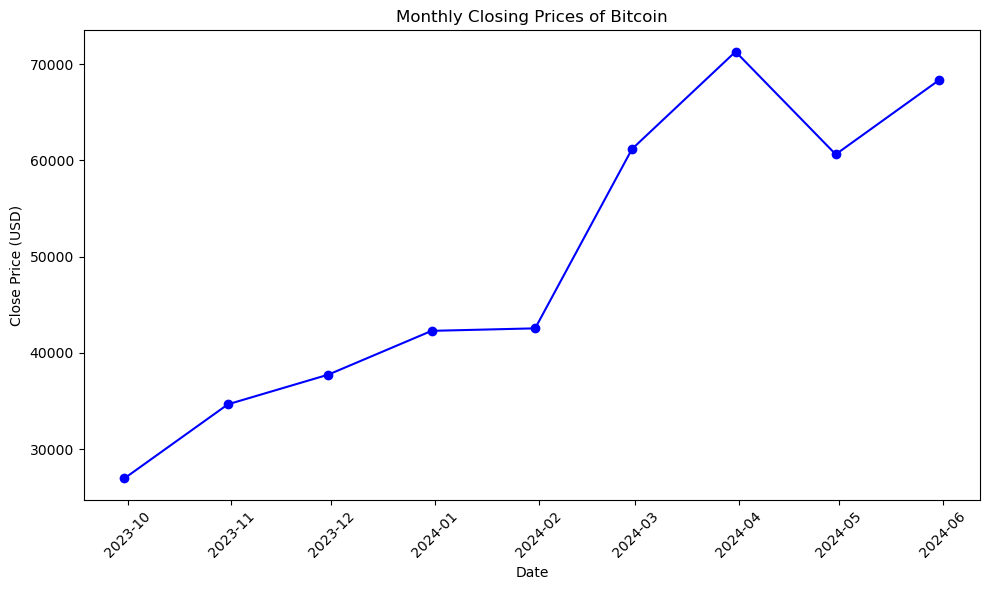

In [13]:

# visualising data → simple lineplot to depict the montly closing price 

# Convert the index to datetime format and sort it
df.index = pd.to_datetime(df.index)
df = df.sort_index()

df = df.astype(float)

# Plot the 'close' column
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['close'], marker='o', linestyle='-', color='b')

# Add title and labels
plt.title('Monthly Closing Prices of Bitcoin')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

#### Step 5 - API Function definition 

This function will be used to automate fetching the data in a data pipeline 

In [14]:
# this code obtains the required information (daily ) 

base_url = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=USD&'

load_dotenv('API.env') # in this case key is stored in a separate .env file that is explicitly excluded from publishing using .gitignore

API_key = os.getenv('alpha_APIkey') # this variable holds the key securely stored in the .env file

if API_key is None: # this check will review if the API key is found 
    raise ValueError("API key not found. Please set it in the API.env file.")

url = base_url + 'apikey=' + API_key

r = requests.get(url)
data = r.json()

# Extract the time series data
time_series_data = data['Time Series (Digital Currency Daily)']

# Convert the time series data into a DataFrame
df = pd.DataFrame.from_dict(time_series_data, orient='index')

# Optionally, rename the columns for better readability
df.columns = ['open', 'high', 'low', 'close', 'volume']

# Convert the index to datetime format and sort it
df.index = pd.to_datetime(df.index)
df = df.sort_index()

print(df)


                      open            high             low           close  \
2023-08-06  29047.33000000  29163.24000000  28955.00000000  29040.01000000   
2023-08-07  29040.01000000  29246.00000000  28660.53000000  29179.21000000   
2023-08-08  29179.28000000  30222.00000000  29104.65000000  29770.01000000   
2023-08-09  29770.01000000  30128.88000000  29344.16000000  29562.76000000   
2023-08-10  29562.76000000  29709.38000000  29306.00000000  29424.03000000   
...                    ...             ...             ...             ...   
2024-05-27  68470.80000000  70613.39000000  68210.12000000  69368.72000000   
2024-05-28  69366.31000000  69533.96000000  67194.59000000  68321.98000000   
2024-05-29  68321.99000000  68864.11000000  67081.66000000  67569.45000000   
2024-05-30  67569.44000000  69536.89000000  67092.91000000  68338.58000000   
2024-05-31  68338.58000000  68438.78000000  68280.11000000  68351.27000000   

                    volume  
2023-08-06   2461.64012073  
2023-

In [15]:
# function defintion to fetch btc daily quotes

def get_crypto_data(symbol='BTC', market='USD'):
    # Define API endpoint and parameters
    base_url = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&'
    load_dotenv('API.env')  # Load API key from environment variables
    api_key = os.getenv('alpha_APIkey')
    
    # Check if API key exists
    if api_key is None:
        raise ValueError("API key not found. Please set it in the API.env file.")
    
    # Construct the complete URL with API key, symbol, and market
    url = f"{base_url}symbol={symbol}&market={market}&apikey={api_key}"
    
    # Make a GET request to the API
    response = requests.get(url)
    
    # Check if request was successful (status code 200)
    if response.status_code != 200:
        raise ValueError(f"Failed to retrieve data from API. Status code: {response.status_code}")
    
    # Extract JSON data from the response
    data = response.json()
    
    # Extract time series data from JSON
    time_series_data = data.get('Time Series (Digital Currency Daily)')
    
    if time_series_data is None:
        raise ValueError("Time series data not found in API response.")
    
    # Convert time series data to DataFrame
    df = pd.DataFrame.from_dict(time_series_data, orient='index')
    
    # Rename columns for readability
    df.columns = ['open', 'high', 'low', 'close', 'volume']
    
    # Convert columns to float
    df = df.astype(float)
    
    # Convert index to datetime and sort
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    
    return df

# Example usage:
crypto_df = get_crypto_data()
print(crypto_df)



                open      high       low     close        volume
2023-08-06  29047.33  29163.24  28955.00  29040.01   2461.640121
2023-08-07  29040.01  29246.00  28660.53  29179.21   9200.085233
2023-08-08  29179.28  30222.00  29104.65  29770.01  15610.254913
2023-08-09  29770.01  30128.88  29344.16  29562.76  10451.451675
2023-08-10  29562.76  29709.38  29306.00  29424.03   7104.556222
...              ...       ...       ...       ...           ...
2024-05-27  68470.80  70613.39  68210.12  69368.72   5384.622781
2024-05-28  69366.31  69533.96  67194.59  68321.98  11975.930863
2024-05-29  68321.99  68864.11  67081.66  67569.45   8970.020591
2024-05-30  67569.44  69536.89  67092.91  68338.58  11841.263819
2024-05-31  68338.58  68438.78  68280.11  68351.27     78.343174

[300 rows x 5 columns]


In [16]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 2023-08-06 to 2024-05-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    300 non-null    float64
 1   high    300 non-null    float64
 2   low     300 non-null    float64
 3   close   300 non-null    float64
 4   volume  300 non-null    float64
dtypes: float64(5)
memory usage: 14.1 KB


In [17]:
# extracting the data for specific time intervals, as an example 6 months

six_months_ago = pd.Timestamp.today() - pd.DateOffset(months=6)
subset_df = crypto_df[crypto_df.index >= six_months_ago]
print(subset_df)



                open      high       low     close        volume
2023-12-01  37732.27  39000.00  37618.25  38703.54  16395.901978
2023-12-02  38706.55  39740.00  38660.03  39471.48   7540.768818
2023-12-03  39467.42  40221.22  39293.02  39984.81   7153.156638
2023-12-04  39984.81  42410.46  39983.60  41987.24  21993.059956
2023-12-05  41985.53  45000.00  41384.03  44084.39  24018.760355
...              ...       ...       ...       ...           ...
2024-05-27  68470.80  70613.39  68210.12  69368.72   5384.622781
2024-05-28  69366.31  69533.96  67194.59  68321.98  11975.930863
2024-05-29  68321.99  68864.11  67081.66  67569.45   8970.020591
2024-05-30  67569.44  69536.89  67092.91  68338.58  11841.263819
2024-05-31  68338.58  68438.78  68280.11  68351.27     78.343174

[183 rows x 5 columns]


In [18]:
# Function definition to fetch BTC daily quotes
def get_crypto_data(symbol='BTC', market='USD', past_months=6):
    # Define API endpoint and parameters
    base_url = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&'
    load_dotenv('API.env')  # Load API key from environment variables
    api_key = os.getenv('alpha_APIkey')
    
    # Check if API key exists
    if api_key is None:
        raise ValueError("API key not found. Please set it in the API.env file.")
    
    # Construct the complete URL with API key, symbol, and market
    url = f"{base_url}symbol={symbol}&market={market}&apikey={api_key}"
    
    # Make a GET request to the API
    response = requests.get(url)
    
    # Check if request was successful (status code 200)
    if response.status_code != 200:
        raise ValueError(f"Failed to retrieve data from API. Status code: {response.status_code}")
    
    # Extract JSON data from the response
    data = response.json()
    
    # Extract time series data from JSON
    time_series_data = data.get('Time Series (Digital Currency Daily)')
    
    if time_series_data is None:
        raise ValueError("Time series data not found in API response.")
    
    # Convert time series data to DataFrame
    df = pd.DataFrame.from_dict(time_series_data, orient='index')
    
    # Rename columns for readability
    df.columns = ['open', 'high', 'low', 'close', 'volume']
    
    # Convert columns to float
    df = df.astype(float)
    
    # Convert index to datetime and sort
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    
    # Filter data for the past specified months
    if past_months is not None:
        cutoff_date = pd.Timestamp.today() - pd.DateOffset(months=past_months)
        df = df[df.index >= cutoff_date]
    
    return df

# Example usage:
crypto_df = get_crypto_data(past_months=6)  # Fetch data for the past 6 months
print(crypto_df)

                open      high       low     close        volume
2023-12-01  37732.27  39000.00  37618.25  38703.54  16395.901978
2023-12-02  38706.55  39740.00  38660.03  39471.48   7540.768818
2023-12-03  39467.42  40221.22  39293.02  39984.81   7153.156638
2023-12-04  39984.81  42410.46  39983.60  41987.24  21993.059956
2023-12-05  41985.53  45000.00  41384.03  44084.39  24018.760355
...              ...       ...       ...       ...           ...
2024-05-27  68470.80  70613.39  68210.12  69368.72   5384.622781
2024-05-28  69366.31  69533.96  67194.59  68321.98  11975.930863
2024-05-29  68321.99  68864.11  67081.66  67569.45   8970.020591
2024-05-30  67569.44  69536.89  67092.91  68338.58  11841.263819
2024-05-31  68338.58  68438.78  68280.11  68351.27     78.343174

[183 rows x 5 columns]


In [19]:
import requests
import pandas as pd
import os
from datetime import datetime
from dateutil.relativedelta import relativedelta
from dotenv import load_dotenv

def get_crypto_data(symbol='BTC', market='USD', past_months=6):
    # Define API endpoint and parameters
    base_url = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&'
    load_dotenv('API.env')  # Load API key from environment variables
    api_key = os.getenv('alpha_APIkey')
    
    # Check if API key exists
    if api_key is None:
        raise ValueError("API key not found. Please set it in the API.env file.")
    
    # Construct the complete URL with API key, symbol, and market
    url = f"{base_url}symbol={symbol}&market={market}&apikey={api_key}"
    
    # Make a GET request to the API
    response = requests.get(url)
    
    # Check if request was successful (status code 200)
    if response.status_code != 200:
        raise ValueError(f"Failed to retrieve data from API. Status code: {response.status_code}")
    
    # Extract JSON data from the response
    data = response.json()
    
    # Extract time series data from JSON
    time_series_data = data.get('Time Series (Digital Currency Daily)')
    
    if time_series_data is None:
        raise ValueError("Time series data not found in API response.")
    
    # Convert time series data to DataFrame
    df = pd.DataFrame.from_dict(time_series_data, orient='index')
    
    # Rename columns for readability
    df.columns = ['open', 'high', 'low', 'close', 'volume']
    
    # Convert columns to float
    df = df.astype(float)
    
    # Convert index to datetime and sort
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    
    # Filter data for the past specified months
    if past_months is not None:
        cutoff_date = pd.Timestamp.today() - pd.DateOffset(months=past_months)
        df = df[df.index >= cutoff_date]
    
    # Reset the index to move the date from index to column
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'date'}, inplace=True)
    
    return df

# Example usage:
crypto_df = get_crypto_data(past_months=6)  # Fetch data for the past 6 months
print(crypto_df)



          date      open      high       low     close        volume
0   2023-12-01  37732.27  39000.00  37618.25  38703.54  16395.901978
1   2023-12-02  38706.55  39740.00  38660.03  39471.48   7540.768818
2   2023-12-03  39467.42  40221.22  39293.02  39984.81   7153.156638
3   2023-12-04  39984.81  42410.46  39983.60  41987.24  21993.059956
4   2023-12-05  41985.53  45000.00  41384.03  44084.39  24018.760355
..         ...       ...       ...       ...       ...           ...
178 2024-05-27  68470.80  70613.39  68210.12  69368.72   5384.622781
179 2024-05-28  69366.31  69533.96  67194.59  68321.98  11975.930863
180 2024-05-29  68321.99  68864.11  67081.66  67569.45   8970.020591
181 2024-05-30  67569.44  69536.89  67092.91  68338.58  11841.263819
182 2024-05-31  68338.58  68438.78  68280.11  68351.27     78.343174

[183 rows x 6 columns]


In [20]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    183 non-null    datetime64[ns]
 1   open    183 non-null    float64       
 2   high    183 non-null    float64       
 3   low     183 non-null    float64       
 4   close   183 non-null    float64       
 5   volume  183 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 8.7 KB
